In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'/Users/srinivasanc/Downloads/datasets/healthcare-dataset-stroke-data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df = data.dropna()

In [6]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.duplicated()

0       False
2       False
3       False
4       False
5       False
        ...  
5104    False
5106    False
5107    False
5108    False
5109    False
Length: 4909, dtype: bool

In [8]:
df.drop('id', axis=1, inplace=True)

/var/folders/hl/jnm75lz146xfgkx412q2nv_c0000gn/T/ipykernel_27377/48924119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('id', axis=1, inplace=True)


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [11]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

/var/folders/hl/jnm75lz146xfgkx412q2nv_c0000gn/T/ipykernel_27377/2924611453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/var/folders/hl/jnm75lz146xfgkx412q2nv_c0000gn/T/ipykernel_27377/2924611453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/var/folders/hl/jnm75lz146xfgkx412q2nv_c0000gn/T/ipykernel_27377/2924611453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

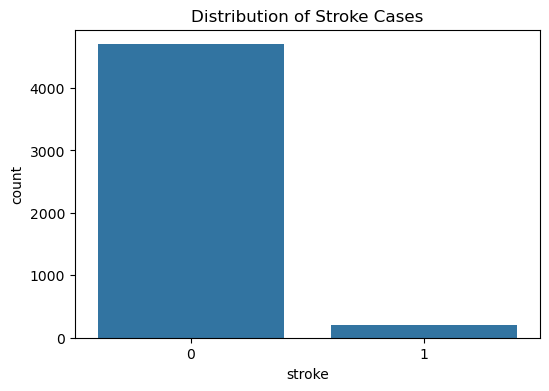

In [12]:
# Target Variable Analysis
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='stroke')
plt.title("Distribution of Stroke Cases")
plt.show()

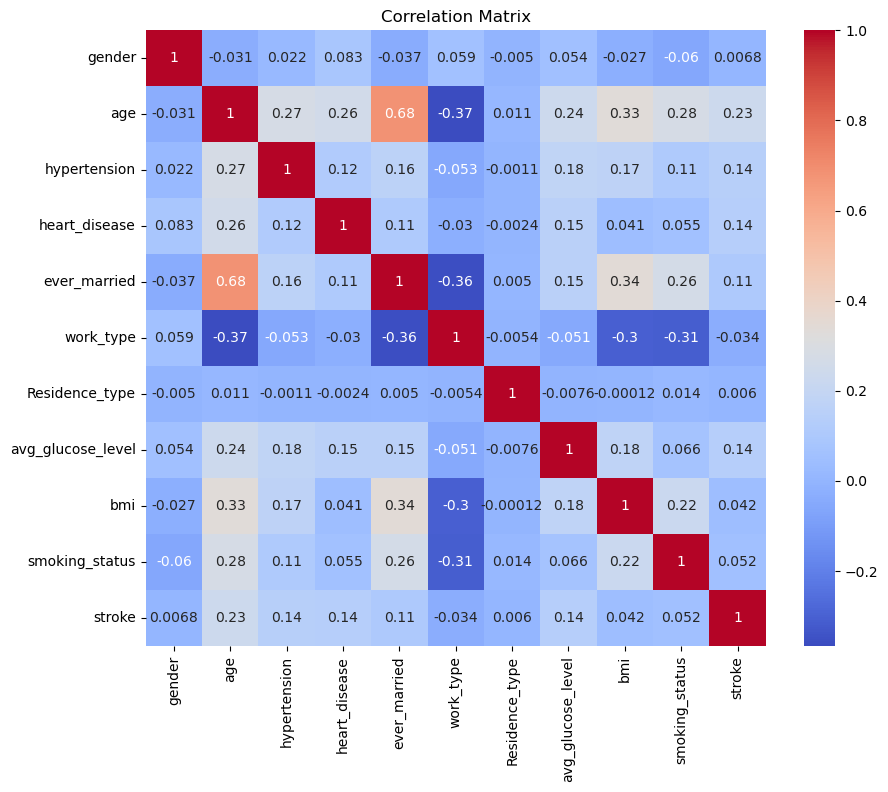

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Scaling numerical data
scaler = StandardScaler()
num_cols = ['age', 'avg_glucose_level', 'bmi']
df[num_cols] = scaler.fit_transform(df[num_cols])

/var/folders/hl/jnm75lz146xfgkx412q2nv_c0000gn/T/ipykernel_27377/118755526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = scaler.fit_transform(df[num_cols])


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler

In [16]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

In [17]:
# Downsampling the Non-Stroke Class
rus = RandomUnderSampler(random_state=42)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train_resampled , y_train_resampled = rus.fit_resample(X_train, y_train)

In [20]:
model = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [21]:
y_pred = model.predict(X_test)

In [22]:
report = classification_report(y_test,y_pred)

In [23]:
acc = roc_auc_score(y_test,y_pred)

In [24]:
print(f'Classification_report :',report)

Classification_report :               precision    recall  f1-score   support

           0       0.99      0.65      0.78      1401
           1       0.11      0.83      0.19        72

    accuracy                           0.65      1473
   macro avg       0.55      0.74      0.49      1473
weighted avg       0.94      0.65      0.75      1473



In [25]:
print(f'roc_accuracy :', acc)

roc_accuracy : 0.7392933618843683


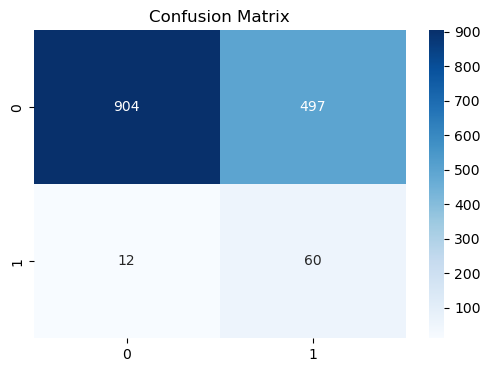

In [26]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

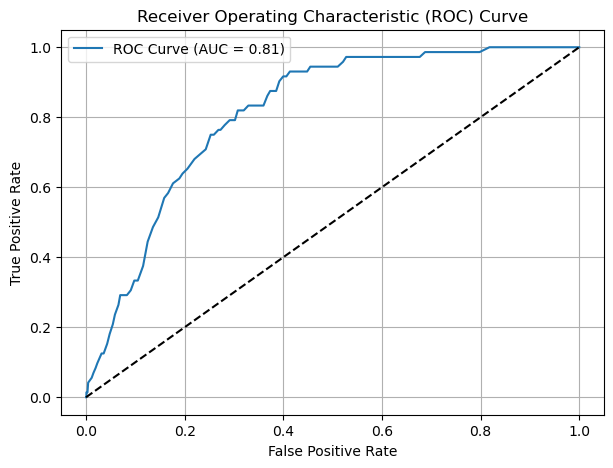

In [27]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

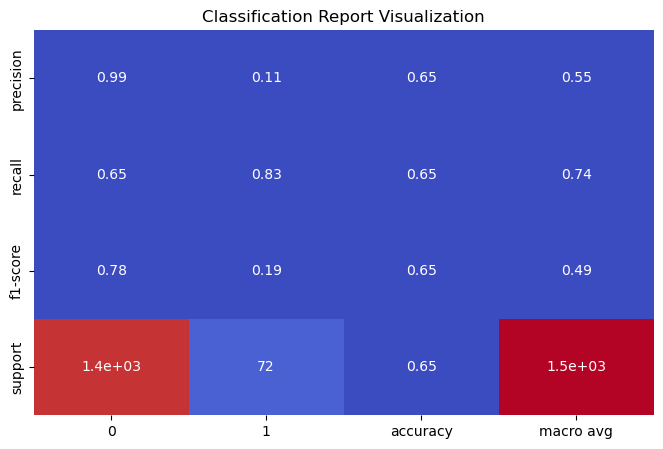

In [28]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).T

# Visualizing the classification report
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm', cbar=False)
plt.title('Classification Report Visualization')
plt.show()

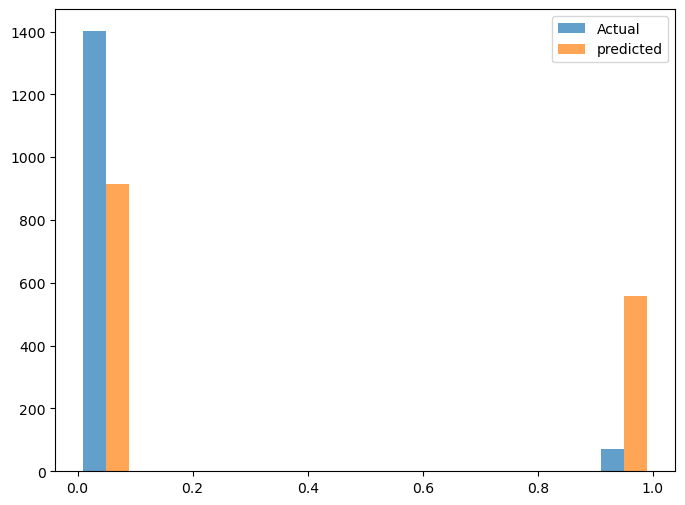

In [29]:
plt.figure(figsize = (8,6))
plt.hist([y_test, y_pred], label=['Actual', 'predicted'], bins = 10, alpha = 0.7)
plt.legend()
plt.show()